# Lab01 : Python Basics & Array

## Introduction

In this lab, you are required to implement a minimum interface of tuples and matrices. 
You may get quite familiar with vectors and points when you are in high school. Don't worry, 
we won't dive deep into linear algebra (though you may find Prof.WANG very fond of it), just 
keep in mind that the matrices we use in this lab simply move a point from one place to another.

We also provide some unit tests to check the basic functionality of your implementation 
and a simple application to put your implementation into use. You job is quite simple and 
straight-forward, so have fun coding :).

### Goal

1. Practice your python basics, such as built-in data structures, control flows, iterations, etc.
2. Get familiar with python OOP and test-driven development style
3. See how fancy things can be done by exploiting simple data structures

### Environment

This lab requires the following packages:
* ipython_unittest
* matplotlib

You may install them using `pip install ipython_unittest matplotlib`. 
Note that the `conda` release of `ipython_unittest` may take longer time to install.

## Task 1 : Points & Vectors

In high school, you may probably use the same notation $(x, y)$ to represent both vectors and points. 
But this notation may cause incoherence, for example, adding two vectors will produce a new vector while adding two points 
is just pointless. 

So, we use a 3-tuple $(x, y, w)$ instead. The additional $w$ is used to mark whether the tuple represents a point or a vector. 
Let $w = 1$ stands for a point and $w = 0$ stands for a vector, please explain how we can benefit from such notation. (Hint: $w \not \in \{0, 1\}$ means nothing in this notation)

> Write your answers here

Using this notation can helps to distinguish the vector and point of same $x, y$ easily. For example, ``((1, 2, 0) == (1, 2, 1)) == False``. Furthermore, It is also helpful for operation ``+``, For example, the operations `+` of the tuples that satisfy these form : 
1. $\mathrm{point} + \mathrm{vector} = \mathrm{point}$
2. $\mathrm{vector} + \mathrm{vector} = \mathrm{vector}$

since that after the result of operation ``+``, it can still keep $w$ in $\{0,1\}$ .

However, $\mathrm{point} + \mathrm{point}$ is invalid, and the result of ``+`` of two point tuples will lead to $w=2$, which suits the definition and regulation of ``+``. 

### Goal

The goal of this task is to plot the trajectory of a projectile in a classical kinematic problem.
The projectile starts with a position and a velocity and constantly suffers a force from environment (typically gravity or wind).
So at each small time interval, the position is updated:
$$
\mathbf p' = \mathbf p + \Delta t \mathbf v
$$
The velosity is also updated:
$$
\mathbf v' = \mathbf v + \Delta t \mathbf a
$$

From the requirements above, please specify the least functionality we need for our tuple interface:

> Write your answers here

### Interface Implementation

In [ ]:
import numbers
# Based on your answer, please complete the implementation
class Tuple3:
    # The constructor method
    def __init__(self, x, y, w):
        # TODO
        self.x, self.y, self.w = x, y, w

    # This function returns true is the tuple represents a point
    def is_point(self):
        # TODO
        return self.w == 1
        
    # This function returns true is the tuple represents a vector
    def is_vector(self):
        # TODO
        return self.w == 0
        
    # This function return a list [x, y, w]
    def to_list(self):
        # TODO
        return [self.x, self.y, self.w]
        
    # Override the operator '==' 
    # Return true is two tuples are equal
    def __eq__(self, rhs):
        # TODO
        return self.x == rhs.x and self.y == rhs.y and self.w == rhs.w
    
    # Other methods we need 
    # You may want to override other operators as well
    def __mul__(self, rhs):
        if isinstance(rhs, numbers.Real):
            return Tuple3(self.x * rhs, self.y * rhs, self.w * rhs)
        else: NotImplemented
    def __rmul__(self, rhs):
        return self.__mul__(rhs)
    def __add__(self, rhs):
        return Tuple3(self.x + rhs.x, self.y + rhs.y, self.w + rhs.w)

### Test-driven development

In real world development, requiements won't pop out altogether at the very begining, thus we must
find a way to properly track the requirement changes. Converting requirements into test cases is proved
to be a good practice, all we have to do is to pass all test cases and then we can believe that the program
will well behave.

The following code implements some tast cases for basic functionality, you should write your own test cases
for the new methods you added above.

Writing test cases using `%%unittest` magic is simple (in our case):
* Use a string `"test_case_name"` to seperate test cases.
* Use `assert bexpr` to address the property that the program must satisfiy. `bexpr` is an expression that returns a `bool` value.

That is enough for this lab. If you still get confused, please check the [document](https://pypi.org/project/ipython-unittest/).

In [ ]:
# Load the unit test extention
# This line is deliberately set to occupy a seperate cell 
%reload_ext ipython_unittest

In [ ]:
%%unittest
"Create a point"
a = Tuple3(4.3, 2.1, 1.0)
assert a.x == 4.3
assert a.y == 2.1
assert a.w == 1.0
assert a.is_point()
assert not a.is_vector()

"Create a vector"
a = Tuple3(4.3, 2.1, 0.0)
assert a.x == 4.3
assert a.y == 2.1
assert a.w == 0.0
assert not a.is_point()
assert a.is_vector()

"Tuple to list"
a = Tuple3(3.0, 2.0, 1.0)
assert a.to_list() == [3.0, 2.0, 1.0]

#======== Add you test cases below ========#

### The `Canvas` class

We implemented a tool class `Canvas` for you to play with. Please read the comments for more details.

In [ ]:
import matplotlib.pyplot as plt
 
class Canvas:
    # The constructor function
    # - width: the width of the canvas
    # - height: the height of the canvas
    # - background: the background color of the canvas, set default to be black
    # - color: the color of pixels, set default to be white
    def __init__(self, width, height, background = [0, 0, 0], color = [255, 255, 255]):
        self.width = width
        self.height = height
        self.background = background
        self.color = color
        self.img = [[background for j in range(width)] for i in range(height)]

    # Illustrate the canvas 
    def show(self):
        plt.figure()
        plt.axis("off")
        plt.imshow(self.img)

    # Set a pixel to self.color at position (x, y) 
    # - return False if the position is out of the canvas
    # - return True otherwise
    def set_pix(self, x, y):
        if 0 <= x and x < self.width\
        and 0 <= y and y < self.height:
            self.img[y][x] = self.color
            return True
        else:
            return False
        
    # Set every pixel in the canvas to self.background
    def clear(self):
        for i in range(self.height):
            for j in range(self.width):
                self.img[i][j] = self.background

### Put the code together

Now we have all tools we want, we can finally design the scenario.

We first define a class `Projectile`, which contains the kinematic status of 
a projectile, typically the `position` and `velocity`.

Then, we have another class `Environment`, which contains the force applied to the 
projectile (for simplicity, we assume that the mass of the projectile is 1Kg thus 
it also represents the acceleration). In our case, we simply use two constant forces,
the `wind` and the `gravity`.

Your task here is to implement the function `tick`, it illustrates how the kinematic status
get updated after a small time interval `dt`. 

In [ ]:
class Projectile:
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity

class Enviroment:
    def __init__(self, gravity, wind) -> None:
        self.gravity = gravity
        self.wind = wind

def tick(env, proj, dt = 0.01):
    # TODO

### Play with your code

If you implement your code correctly, by running the cell below, you may see a parabola:

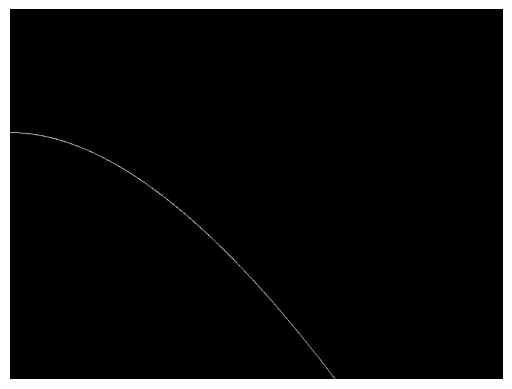

Now it is up to you to play with the code, change the starting condition or environment
to see how things may change!

> Note: You must draw a new trajectory with different starting condition or environment

In [ ]:
# Create the canvas
width = 800
height = 600
c = Canvas(800, 600)
# Create the environment
g = Tuple3(0, 10, 0)
w = Tuple3(2, 0, 0)
env = Enviroment(g, w)
# Create the projectile
p = Tuple3(0, 200, 1)
v = Tuple3(50, 0, 0)
proj = Projectile(p, v)

while (c.set_pix(round(proj.position.x), round(proj.position.y))):
    proj = tick(env, proj)

c.show()

## Task 2: Matrices

In this task, we will do something even more interesting! We will have fun
with bizarre fractal objects: Iterate Funtion Systems (IFSs).

The following image illustrates how a Sierpinski's triangle generates.

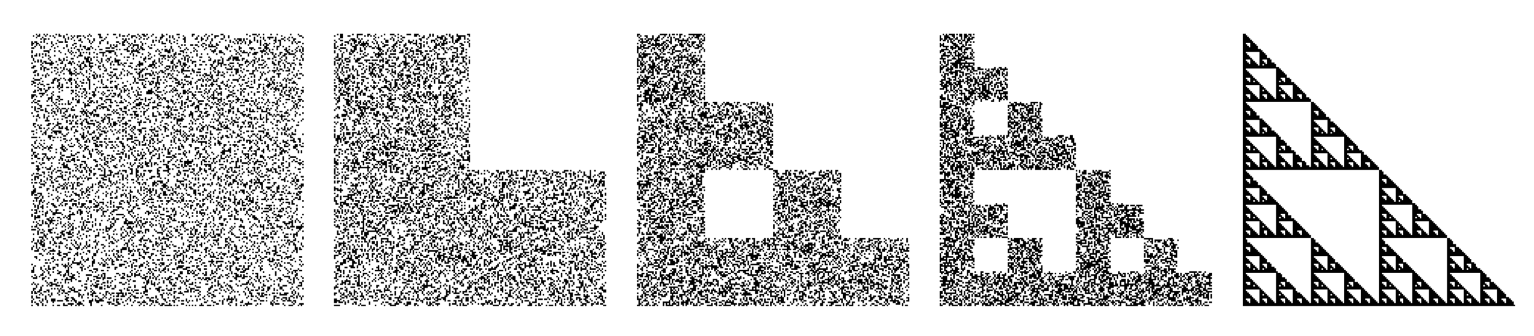

So the process is quite clear:
1. Randomly generate many points
2. At each iteration, each point $(x, y)$ is scaled to $(\frac{x}{2}, \frac{y}{2})$, then it is either moved up by $height / 2$, or moved right by $width / 2$, or not moving.
3. Repeat step 2, until the outcome seems awesome.

So, to keep it simple, an IFS is just some functions that transform a point from one position to another. In addtion, each function in IFS is attached with a possibility that controls how likely a point will transform this way.

We will not dive deep into linear algebra, just keep in mind that rotation, scaling and moving points are just linear tranformations, thus can be expressed by matrices. The tranformation of points is just matrix multiplication, the only thing you have to do is to complete the implementation of the `Matrix3` interface.

For your interest, matrix multiplication is computed as follows:
$$
\begin{pmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{pmatrix} \cdot 
\begin{pmatrix}
x\\
y\\
w
\end{pmatrix}
=
\begin{pmatrix}
a_{11}x + a_{12}y + a_{13}w\\
a_{21}x + a_{22}y + a_{23}w\\
a_{31}x + a_{32}y + a_{33}w
\end{pmatrix}
$$

If you still get confused, I strongly recommand you to watch 3B1B's [Linear Algebra Series](https://www.bilibili.com/video/BV1ys411472E)


In [ ]:
class Matrix3:
    # The constuctor function
    def __init__(self, mat):
        # I finished this method for you
        # This technique is called list comprehension
        # May be helpful when dealing with arrays :)
        self.mat = [[mat[i][j] for j in range(3)] for i in range(3)]
    
    # Override the operator '=='
    # Return Ture is two matrices are equal, False otherwise
    def __eq__(self, rhs):
        # TODO
    
    # Override the operator "[]"
    # Return the corresponding value for Matrix3[id]
    def __getitem__(self, i):
        return self.mat[i]
    
    # Override the assignment alter operator "[]"
    def __setitem__(self, i, v):
        self.mat[i] = v
    
    # Override the operator "*"
    def __mul__(self, rhs):
        # TODO

In [ ]:
%%unittest
"Create a matrix"
m = Matrix3([
    [1.0, 2.0, 3.0],
    [5.5, 6.5, 7.5],
    [9.0, 10.0, 11.0]
])
assert m[0][0] == 1.0
assert m[0][1] == 2.0
assert m[0][2] == 3.0
assert m[1][0] == 5.5
assert m[1][1] == 6.5
assert m[1][2] == 7.5
assert m[2][0] == 9.0
assert m[2][1] == 10.0
assert m[2][2] == 11.0

"Modify a matrix"
m = Matrix3([
    [1.0, 2.0, 3.0],
    [5.5, 6.5, 7.5],
    [9.0, 10.0, 11.0]
])
m[2][2] = 5.0
assert m[2][2] == 5.0
m[1] = [0.0, 0.0, 0.0]
assert m[1][0] == 0.0
assert m[1][1] == 0.0
assert m[1][2] == 0.0

"Matrix Multiplication"
A = Matrix3([
    [1, 2, 3], 
    [2, 4, 4],
    [0, 0, 1]])
b = Tuple3(1, 2, 1)
c = Tuple3(8, 14, 1)
assert A * b == c

### The `LFS` class

Please read the comments and complete the implementation. 

In [ ]:
import random

class IFS:
    # The constructor function
    # -n: the total amount of points
    # -canvas: the canvas we need to illustrate the IFS
    def __init__(self, n, canvas = Canvas(800, 800)):
        self.points = []
        self.matrices = []
        self.canvas = canvas

        for i in range(n):
            x = random.random()
            y = random.random()
            self.points.append(Tuple3(x, y, 1))

    # The function that adds matrices with probability 
    # -prob: the probability
    # -mat: the matrix
    def add_matrix(self, prob, mat):
        self.matrices.append({'prob' : prob, 'mat' : mat})

    # The function that ensure all probability sums up to 1
    def normalize(self):
        tot = sum([m['prob'] for m in self.matrices])
        for m in self.matrices:
            m['prob'] /= tot

    # The function that returns the random choise of matrix
    def choose_matrix(self):
        x = random.random()
        tot = 0
        for m in self.matrices:
            tot += m['prob']
            if tot >= x: return m['mat']
        return self.matrices[-1]['mat']
    
    # The function that performs iteration
    # -passes: the how many time the iteration will take place
    # -visible: whether to show outcomes of each iteration or not
    def iteration(self, passes, visible = False):
        for i in range(passes):
            # p is a reference to the points 
            # So it is okay to just modify p.x and p.y
            for p in self.points:
                # TODO

            if visible:
                self.show()

    # To display the outcome
    def show(self):
        self.canvas.clear()
        height = self.canvas.height
        width = self.canvas.width
        for p in self.points:
            x = round(p.x * width)
            # Note that the zero point of an image is the upper-left, instead of bottom-left
            # Thus the y-axis is reverted
            y = height - round(p.y * height)
            if x == width: x -= 1 
            if y == height: y -= 1
            self.canvas.set_pix(x, y)
        self.canvas.show()

### Play with your code

Now you may create you own IFS. The following code will draw a builtiful fern.

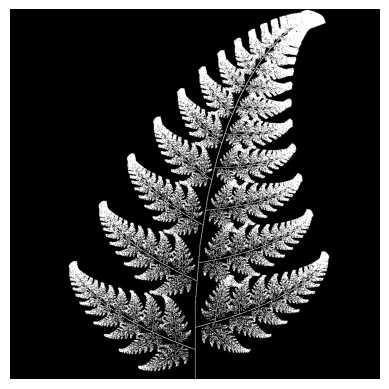

We also provide some other IFSs for you, please try them and have fun! If you are confident about your knowledge of linear algebra, try construct your own IFS! (If you are interested, there is [a comprehensive guide about transformation matrix](https://learnopengl.com/Getting-started/Transformations))

In [ ]:
ifs = IFS(300000)

ifs.add_matrix(0.02, Matrix3([
    [0.0, 0.0, 0.5],
    [0.0, 0.2, 0.0],
    [0.0, 0.0, 1.0]
]))

ifs.add_matrix(0.8, Matrix3([
    [0.817377, 0.065530, 0.091311],
    [-0.065530, 0.817377, 0.232765],
    [0.000000, 0.000000, 1.000000]
]))

ifs.add_matrix(0.09, Matrix3([
    [0.108707, -0.372816, 0.445646], 
    [0.279612, 0.144943, -0.059806],
    [0.000000, 0.000000, 1.000000]
]))

ifs.add_matrix(0.09, Matrix3([
    [-0.080250, 0.385423, 0.540125],
    [0.289067, 0.107000, -0.004534],
    [0.000000, 0.000000, 1.000000]
]))

ifs.iteration(10)

ifs.show()

In [ ]:
''' 
# Dragon
ifs.add_matrix(0.5, Matrix3([
    [0.500124, 0.499725, -0.250062],
    [-0.499725, 0.500124, 0.249863],
    [0.000000, 0.000000, 1.000000]
]))

ifs.add_matrix(0.5, Matrix3([
    [-0.499327, 0.500521, 0.749664],
    [-0.500521, -0.499327, 0.750261],
    [0.000000, 0.000000, 1.000000]
]))

# Siepinski's Triangle
ifs.add_matrix(0.33, Matrix3([
    [0.5, 0.0, 0.0],
    [0.0, 0.5, 0.0],
    [0.0, 0.0, 1.0]
]))

ifs.add_matrix(0.33, Matrix3([
    [0.5, 0.0, 0.5],
    [0.0, 0.5, 0.0],
    [0.0, 0.0, 1.0]
]))

ifs.add_matrix(0.34, Matrix3([
    [0.5, 0.0, 0.0],
    [0.0, 0.5, 0.5],
    [0.0, 0.0, 1.0]
]))

# Big X
ifs.add_matrix(0.2, Matrix3([
    [0.33, 0.00, 0.00],
    [0.00, 0.33, 0.00],
    [0.00, 0.00, 1.00]
]))

ifs.add_matrix(0.2, Matrix3([
    [0.33, 0.00, 0.66],
    [0.00, 0.33, 0.00],
    [0.00, 0.00, 1.00]
]))

ifs.add_matrix(0.2, Matrix3([
    [0.33, 0.00, 0.33],
    [0.00, 0.33, 0.33],
    [0.00, 0.00, 1.00]
]))

ifs.add_matrix(0.2, Matrix3([
    [0.33, 0.00, 0.00],
    [0.00, 0.33, 0.66],
    [0.00, 0.00, 1.00]
]))

ifs.add_matrix(0.2, Matrix3([
    [0.33, 0.00, 0.66],
    [0.00, 0.33, 0.66],
    [0.00, 0.00, 1.00]
]))
'''

## Grading Policy

The grades of this is lab is composed of:
* Submission: 50%
* Finishing Task1: 25%
  * Two short questions: 5%
  * Code completion: 10%
  * Custome test cases: 5%
  * Custome scanario: 5%
* Finishing Task2: 25%
  * Code completion: 10%
  * Extra LFSs: 5% each